In [1]:
import cv2 
import matplotlib.pyplot as plt

In [2]:
net = cv2.dnn.readNetFromTensorflow("graph_opt.pb") ## weights

In [3]:
inWidth = 368
inHeight = 368
thr = 0.11

In [4]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                   "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                   ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                   ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                   ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

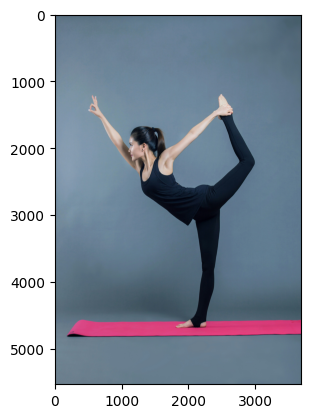

In [5]:
img = cv2.imread("media/pose1.jpg")
plt.imshow(cv2.cv2tColor(img, cv2.COLOR_BGR2RGB))

In [6]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv2.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
        
    t, _ = net.getPerfProfile()
    freq = cv2.getTickFrequency() / 1000
    cv2.putText(frame, '%.2fms' % (t / freq), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame


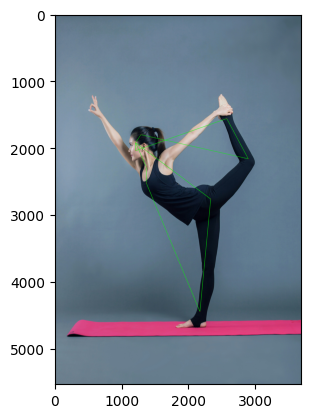

In [7]:
estimated_image = pose_estimation(img)
plt.imshow(cv2.cv2tColor(estimated_image, cv2.COLOR_BGR2RGB))

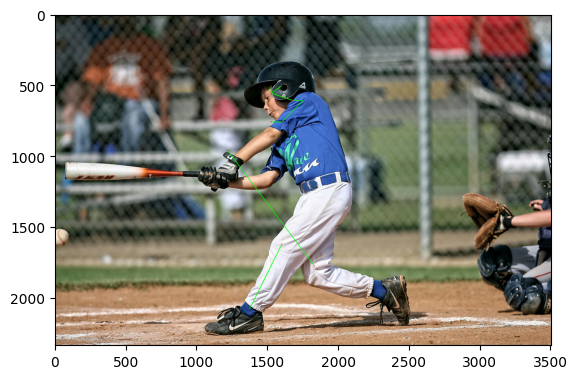

In [8]:
img = cv2.imread("media/pose3.jpg")
plt.imshow(cv2.cv2tColor(img, cv2.COLOR_BGR2RGB))
estimated_image = pose_estimation(img)
plt.imshow(cv2.cv2tColor(estimated_image, cv2.COLOR_BGR2RGB))

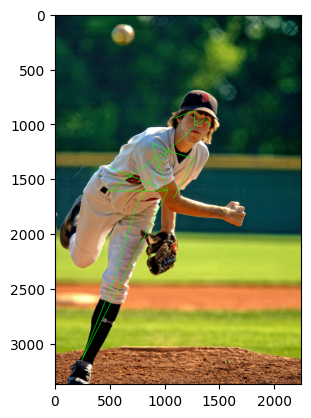

In [10]:
img = cv2.imread("media/pose4.jpg")
plt.imshow(cv2.cv2tColor(img, cv2.COLOR_BGR2RGB))
estimated_image = pose_estimation(img)
plt.imshow(cv2.cv2tColor(estimated_image, cv2.COLOR_BGR2RGB))

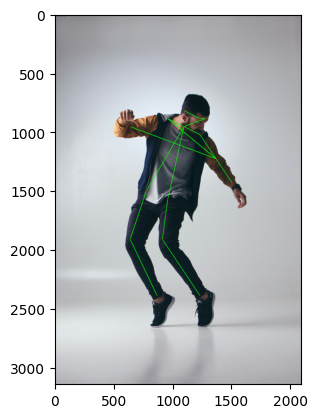

In [11]:
img = cv2.imread("media/pose7.jpg")
plt.imshow(cv2.cv2tColor(img, cv2.COLOR_BGR2RGB))
estimated_image = pose_estimation(img)
plt.imshow(cv2.cv2tColor(estimated_image, cv2.COLOR_BGR2RGB))

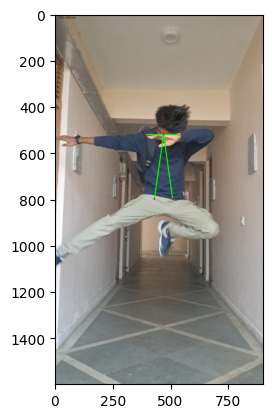

In [12]:
img = cv2.imread("media/pose12.jpeg")
plt.imshow(cv2.cv2tColor(img, cv2.COLOR_BGR2RGB))
estimated_image = pose_estimation(img)
plt.imshow(cv2.cv2tColor(estimated_image, cv2.COLOR_BGR2RGB))

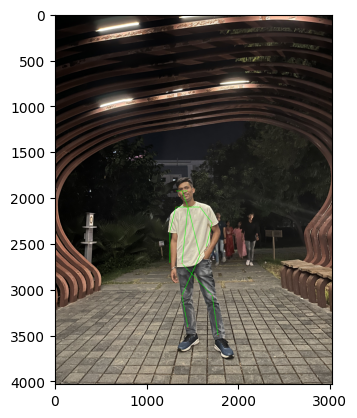

In [13]:
img = cv2.imread("media/demo.jpg")
plt.imshow(cv2.cv2tColor(img, cv2.COLOR_BGR2RGB))
estimated_image = pose_estimation(img)
plt.imshow(cv2.cv2tColor(estimated_image, cv2.COLOR_BGR2RGB))